In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import cv2
import matplotlib.pyplot as plt
import os

/kaggle/input/dogs-vs-cats/test1.zip
/kaggle/input/dogs-vs-cats/train.zip
/kaggle/input/dogs-vs-cats/sampleSubmission.csv


In [3]:
# --- Buruşukluk Efekti Fonksiyonu (Bizim Sihirli Tarifimiz) ---
def apply_wrinkle_effect(image):
    rows, cols, _ = image.shape
    x_map = np.zeros((rows, cols), np.float32)
    y_map = np.zeros((rows, cols), np.float32)
    
    frequency = np.random.uniform(5, 10) 
    amplitude = np.random.uniform(10, 20)
    
    for i in range(rows):
        for j in range(cols):
            x_map[i, j] = j + amplitude * np.cos(2 * np.pi * i / (rows / frequency))
            y_map[i, j] = i + amplitude * np.sin(2 * np.pi * j / (cols / frequency))
            
    wrinkled_image = cv2.remap(image, x_map, y_map, interpolation=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REPLICATE)
    return wrinkled_image

print("Buruşturma fonksiyonu (apply_wrinkle_effect) başarıyla oluşturuldu. Artık kullanıma hazır!")

Buruşturma fonksiyonu (apply_wrinkle_effect) başarıyla oluşturuldu. Artık kullanıma hazır!


In [4]:
# --- Fonksiyonu Test Edelim ---

# Veri setimizdeki eğitim klasörünün yolunu buluyoruz
train_dir = '/kaggle/input/dogs-vs-cats/train/train/'
image_files = os.listdir(train_dir)
# Test yapmak için listenin en başındaki ilk resmi seçiyoruz
test_image_name = image_files[0] 
image_path = os.path.join(train_dir, test_image_name)

print(f"Test için seçilen resim: {test_image_name}")

# Resmi okuyalım ve renklerini düzeltelim
original_image = cv2.imread(image_path)
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

# Sihirli fonksiyonumuzu resme uygulayalım
wrinkled_image = apply_wrinkle_effect(original_image)
print("Efekt başarıyla uygulandı!")

# Sonuçları ekranda gösterelim
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Orijinal Resim')
plt.imshow(original_image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Buruşuk Efekti Uygulanmış Resim')
plt.imshow(wrinkled_image)
plt.axis('off')

plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/dogs-vs-cats/train/train/'

In [5]:
import os

print("Mevcut bütün dosyaların adresleri:")
# /kaggle/input/ klasörünün içindeki her şeyi listeliyoruz
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Mevcut bütün dosyaların adresleri:
/kaggle/input/dogs-vs-cats/test1.zip
/kaggle/input/dogs-vs-cats/train.zip
/kaggle/input/dogs-vs-cats/sampleSubmission.csv


In [6]:
import zipfile

# Zip dosyasının adresini belirtiyoruz
zip_path = '/kaggle/input/dogs-vs-cats/train.zip'

# Dosyaları nereye açacağımızı belirtiyoruz (çalışma klasörümüz)
extract_path = '/kaggle/working/'

# Zip dosyasını açma işlemini başlatıyoruz
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("train.zip dosyası başarıyla '/kaggle/working/' klasörüne açıldı!")
print("Artık resimler kullanılmaya hazır.")

train.zip dosyası başarıyla '/kaggle/working/' klasörüne açıldı!
Artık resimler kullanılmaya hazır.


In [ ]:
# --- DÜZELTİLMİŞ Test Kodu ---

# Adresi, resimleri açtığımız yeni yere göre güncelledik
train_dir = '/kaggle/working/train/'
image_files = os.listdir(train_dir)
test_image_name = image_files[0] 
image_path = os.path.join(train_dir, test_image_name)

print(f"Test için seçilen resim: {test_image_name}")

# Resmi okuyalım ve renklerini düzeltelim
original_image = cv2.imread(image_path)
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

# Sihirli fonksiyonumuzu resme uygulayalım
wrinkled_image = apply_wrinkle_effect(original_image)
print("Efekt başarıyla uygulandı!")

# Sonuçları ekranda gösterelim
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Orijinal Resim')
plt.imshow(original_image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Buruşuk Efekti Uygulanmış Resim')
plt.imshow(wrinkled_image)
plt.axis('off')

plt.show()

Lekeleme fonksiyonu (apply_stain_effect) başarıyla oluşturuldu. Artık kullanıma hazır!
Leke efekti başarıyla uygulandı!


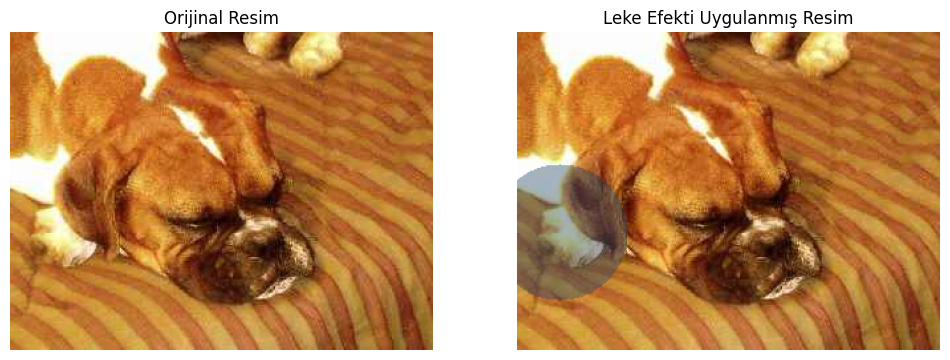

In [7]:
# --- Leke Efekti Fonksiyonu (Bizim İkinci Sihirli Tarifimiz) ---
def apply_stain_effect(image):
    """
    Bu fonksiyon, içine konan bir resme rastgele bir leke ekler.
    """
    # Görüntünün bir kopyasını alıyoruz ki orijinali bozulmasın
    stained_image = image.copy()
    
    # Resmin boyutlarını alıyoruz
    rows, cols, _ = image.shape
    
    # Lekenin merkezini rastgele seçiyoruz
    stain_center_x = np.random.randint(0, cols)
    stain_center_y = np.random.randint(0, rows)
    
    # Lekenin büyüklüğünü (yarıçapını) rastgele seçiyoruz
    stain_radius = np.random.randint(int(cols/10), int(cols/4))
    
    # Lekenin rengini belirliyoruz (BGR formatında kahverengi tonu)
    stain_color = (33, 67, 101) 
    
    # Lekenin şeffaflığı için ayrı bir katman oluşturuyoruz
    overlay = stained_image.copy()
    cv2.circle(overlay, (stain_center_x, stain_center_y), stain_radius, stain_color, -1) # -1 içi dolu daire demek
    
    # Şeffaflık oranını belirliyoruz (alpha değeri)
    alpha = 0.4 # %40 şeffaflıkta bir leke
    
    # Orijinal resim ile leke katmanını birleştiriyoruz
    cv2.addWeighted(overlay, alpha, stained_image, 1 - alpha, 0, stained_image)
    
    return stained_image

print("Lekeleme fonksiyonu (apply_stain_effect) başarıyla oluşturuldu. Artık kullanıma hazır!")

# --- Yeni Fonksiyonumuzu Test Edelim ---

# Test için aynı resmi tekrar bulalım
train_dir = '/kaggle/working/train/'
image_files = os.listdir(train_dir)
test_image_name = image_files[0] 
image_path = os.path.join(train_dir, test_image_name)

# Resmi okuyalım ve renklerini düzeltelim
original_image = cv2.imread(image_path)
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

# YENİ sihirli fonksiyonumuzu resme uygulayalım
stained_image = apply_stain_effect(original_image)
print("Leke efekti başarıyla uygulandı!")

# Sonuçları ekranda gösterelim
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Orijinal Resim')
plt.imshow(original_image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Leke Efekti Uygulanmış Resim')
plt.imshow(stained_image)
plt.axis('off')

plt.show()

Yırtık fonksiyonu (apply_tear_effect) oluşturuldu.
cat.7657.jpg resmine yırtık efekti uygulandı.


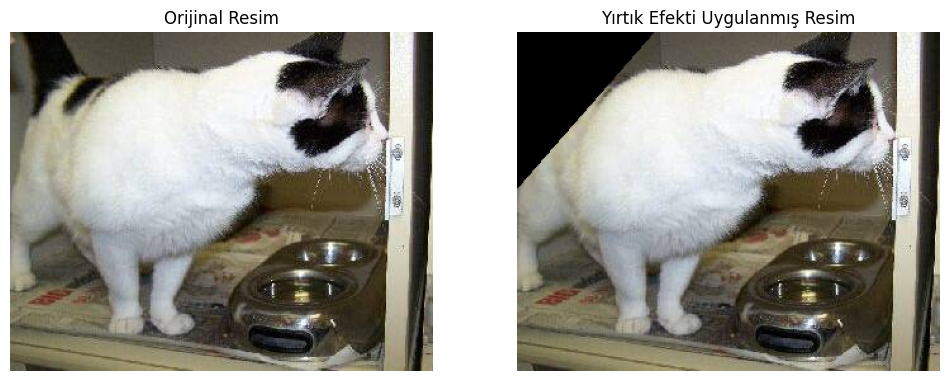

In [8]:
# Yırtık efekti fonksiyonu
def apply_tear_effect(image):
    # Orjinal görüntüyü korumak için kopya oluştur
    torn_image = image.copy()
    rows, cols, _ = image.shape
    
    # Yırtık boyutunu rastgele belirle
    tear_size_x = np.random.randint(int(cols/4), int(cols/2))
    tear_size_y = np.random.randint(int(rows/4), int(rows/2))
    
    # Rastgele köşe seçimi (0:sol-üst, 1:sağ-üst, 2:sol-alt, 3:sağ-alt)
    corner = np.random.randint(0, 4)
    
    # Seçilen köşeye göre üçgen noktalarını tanımla
    if corner == 0:
        pts = np.array([[0, 0], [tear_size_x, 0], [0, tear_size_y]], np.int32)
    elif corner == 1:
        pts = np.array([[cols, 0], [cols - tear_size_x, 0], [cols, tear_size_y]], np.int32)
    elif corner == 2:
        pts = np.array([[0, rows], [0, rows - tear_size_y], [tear_size_x, rows]], np.int32)
    else:
        pts = np.array([[cols, rows], [cols - tear_size_x, rows], [cols, rows - tear_size_y]], np.int32)
        
    # Tanımlanan üçgeni siyah ile doldur
    cv2.fillPoly(torn_image, [pts], (0, 0, 0))
    
    return torn_image

print("Yırtık fonksiyonu (apply_tear_effect) oluşturuldu.")

# --- Test ---

# Test edilecek resmi seç
train_dir = '/kaggle/working/train/'
image_files = os.listdir(train_dir)
test_image_name = image_files[1] # Bu sefer farklı bir resim seçelim (ilk resim yerine ikinci)
image_path = os.path.join(train_dir, test_image_name)

# Resmi yükle ve renk formatını (BGR->RGB) düzelt
original_image = cv2.imread(image_path)
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

# Yırtık efektini uygula
torn_image = apply_tear_effect(original_image)
print(f"{test_image_name} resmine yırtık efekti uygulandı.")

# Orjinal ve yırtık resmi yan yana göster
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Orijinal Resim')
plt.imshow(original_image)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title('Yırtık Efekti Uygulanmış Resim')
plt.imshow(torn_image)
plt.axis('off')
plt.show()